RAneem mousa 202200389 FXGBoost + 5 XAI  (shap , pdp ,lime ,Permutation importance,ROCCURVE )

In [1]:
!pip install xlearn scikit-learn pandas shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xlearn: filename=xlearn-0.40a1-py3-none-any.whl size=225738 sha256=ad425bb5271c8909eecd1c4c84ca71af6236460db36461a62c8d7745d1fa4f8c
  Stored in directory: /root/.cache/pip/wheels/72/26/6e/2972274d133f591c34d9299ee113ee5c66bd1b2b1a79006789
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=eb3bd3687b5aa930972a16e5a93bc92e064de85bbe461a3e67f39b5daf7b6086
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built xlearn lime


In [2]:
!pip install lime


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import shap
import lime
import lime.lime_tabular
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve





PREPROCING

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [8]:
df.shape,
test_df.shape

(50000, 27)

In [9]:
df.shape,df


((87497, 28),
             ID Customer_ID     Month             Name   Age          SSN  \
 0       0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
 1       0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
 2       0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
 3       0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
 4       0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
 ...        ...         ...       ...              ...   ...          ...   
 87492  0x216a6  CUS_0x2ded       May  Lisa Baertleina    53  985-21-8683   
 87493  0x216a7  CUS_0x2ded      June  Lisa Baertleina    53  985-21-8683   
 87494  0x216a8  CUS_0x2ded      July  Lisa Baertleina    53  985-21-8683   
 87495  0x216a9  CUS_0x2ded    August  Lisa Baertleina    53  985-21-8683   
 87496  0x216ae  CUS_0x28c4        Ja              NaN   NaN          NaN   
 
       Occupation Annual_Income  Monthly_Inhand_Salary  Num_

In [10]:
test_df.shape,test_df

((50000, 27),
             ID Customer_ID      Month             Name   Age          SSN  \
 0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
 1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
 2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
 3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
 4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
 ...        ...         ...        ...              ...   ...          ...   
 49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
 49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
 49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
 49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
 49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   
 
       Occupation Annual_Income  Monthly_Inhand_

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87497 entries, 0 to 87496
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        87497 non-null  object 
 1   Customer_ID               87497 non-null  object 
 2   Month                     87497 non-null  object 
 3   Name                      78734 non-null  object 
 4   Age                       87496 non-null  object 
 5   SSN                       87496 non-null  object 
 6   Occupation                87496 non-null  object 
 7   Annual_Income             87496 non-null  object 
 8   Monthly_Inhand_Salary     74355 non-null  float64
 9   Num_Bank_Accounts         87496 non-null  float64
 10  Num_Credit_Card           87496 non-null  float64
 11  Interest_Rate             87496 non-null  float64
 12  Num_of_Loan               87496 non-null  object 
 13  Type_of_Loan              77648 non-null  object 
 14  Delay_

In [12]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,74355.000000,87496.000000,87496.000000,87496.000000,87496.000000,85790.000000,87496.000000,87496.000000
mean,4181.168876,17.015635,22.526184,72.475005,21.131400,27.845845,32.293353,1405.536575
std,3177.535506,117.379154,129.644694,465.808675,14.917771,193.025047,5.115817,8316.668485
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1623.476042,4.000000,4.000000,8.000000,10.000000,3.000000,28.054689,30.693931
50%,3077.831667,6.000000,6.000000,14.000000,18.000000,6.000000,32.325423,69.494048
75%,5937.530000,7.000000,7.000000,20.000000,28.000000,9.000000,36.503128,160.666150
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [13]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,8763
Age,1
SSN,1
Occupation,1
Annual_Income,1
Monthly_Inhand_Salary,13142
Num_Bank_Accounts,1


In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

,0
ID,87497
Customer_ID,10938
Month,9
Name,9079
Age,1587
SSN,10938
Occupation,16
Annual_Income,16539
Monthly_Inhand_Salary,11576
Num_Bank_Accounts,844


In [16]:
df.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


In [17]:
df.dropna(inplace=True)

In [18]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [19]:
print(df['Credit_Score'].value_counts())


Credit_Score
Standard    24415
Poor        14580
Good         7494
Name: count, dtype: int64


Handle Imbalance with SMOTENC



In [20]:
# cat_cols = X.select_dtypes(include=['int', 'object']).columns.tolist()
# cat_indices = [i for i, col in enumerate(X.columns) if col in cat_cols]


In [21]:
print(df.columns.tolist())

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


#EDA

Visualizing class distribution


Target Distribution

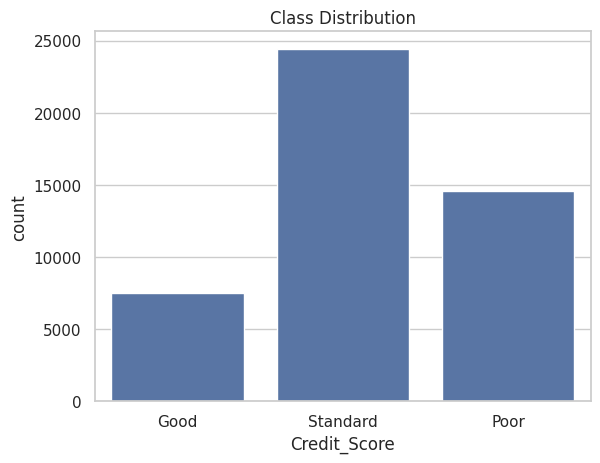

In [22]:
sns.countplot(data=df, x='Credit_Score')
plt.title("Class Distribution")
plt.show()

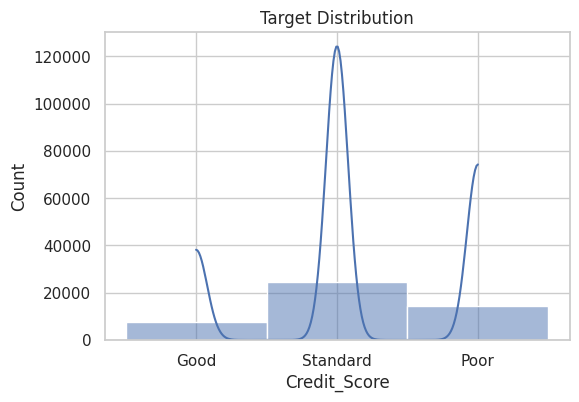

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Credit_Score"], kde=True)
plt.title("Target Distribution")
plt.show()

Histogram of numeric columns


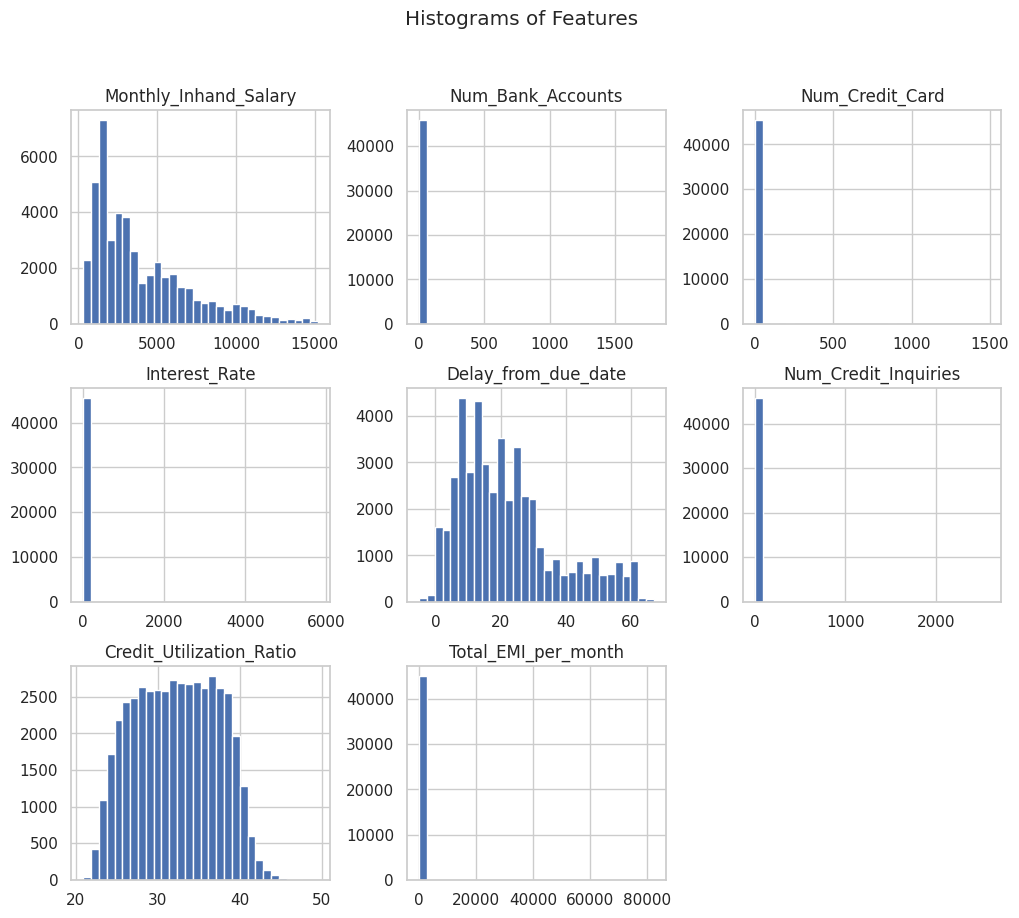

In [24]:
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Features")
plt.show()


Correlation heatmap

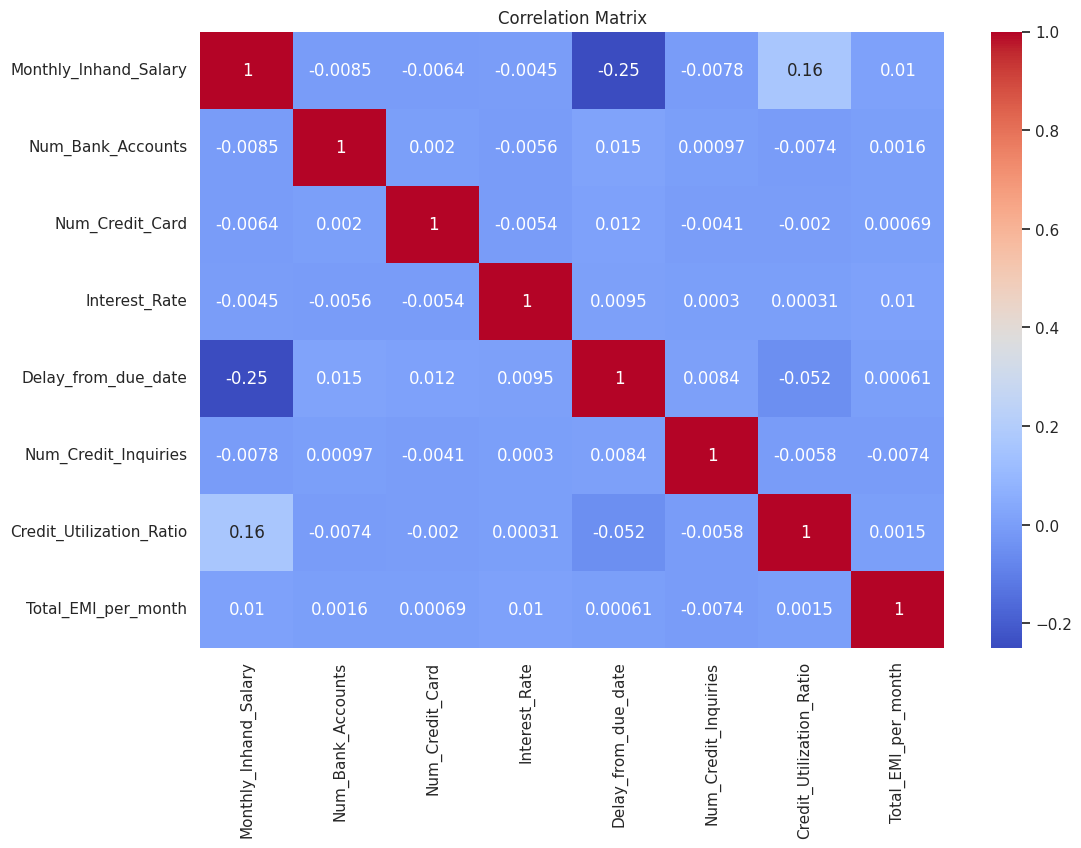

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



Boxplots


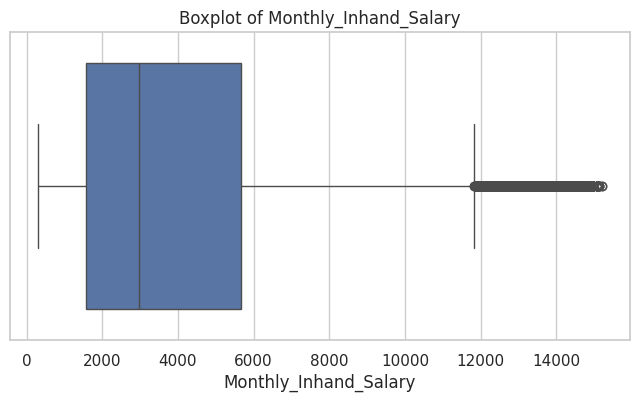

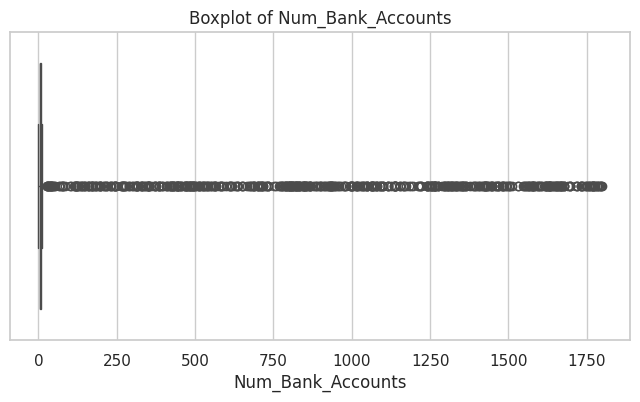

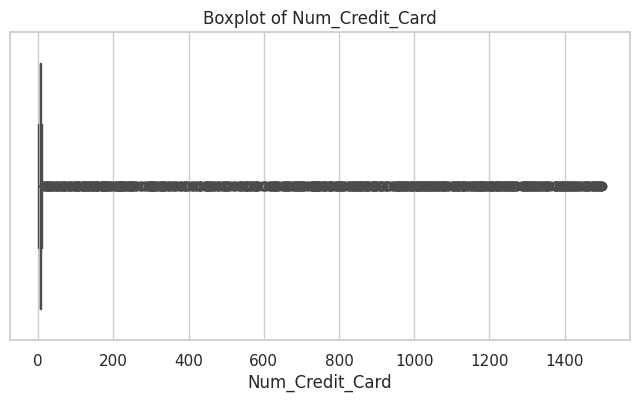

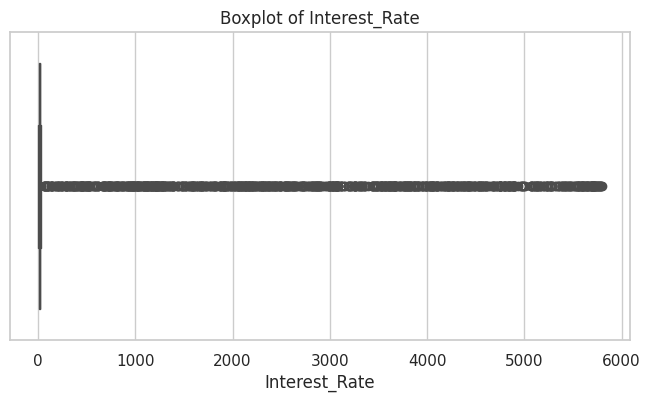

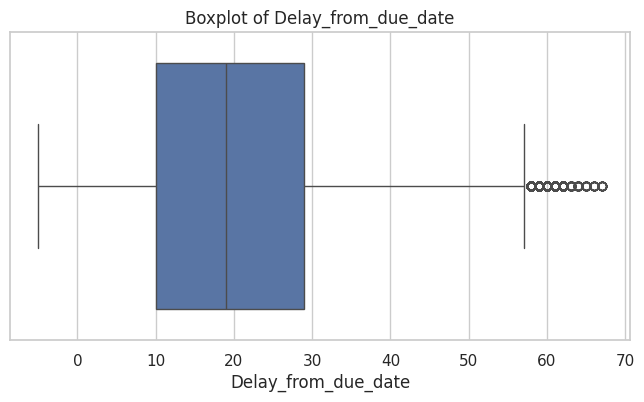

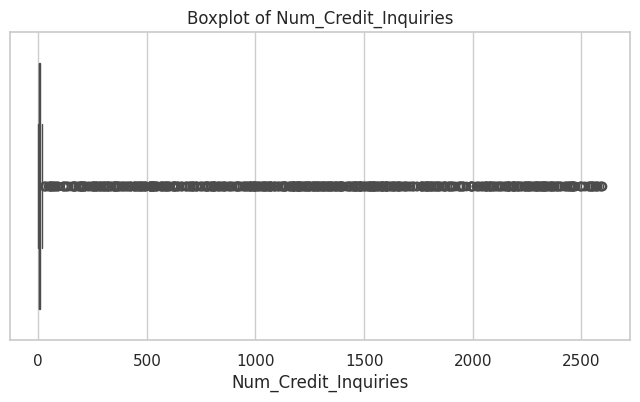

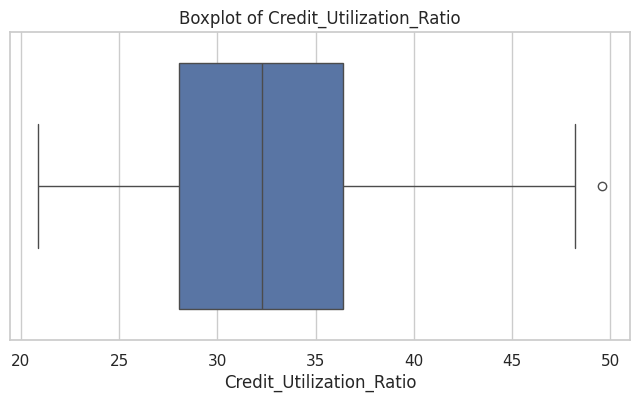

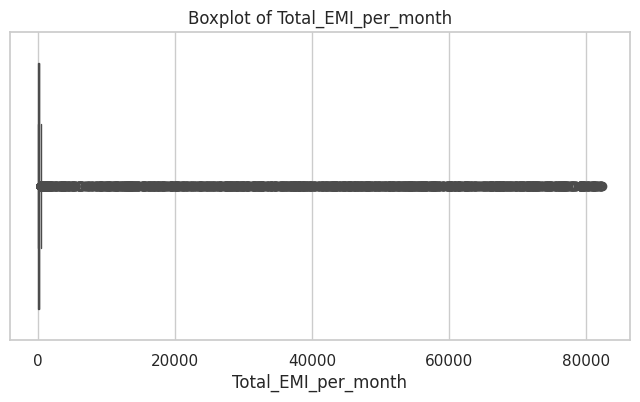

In [26]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Pairplot for feature relationships


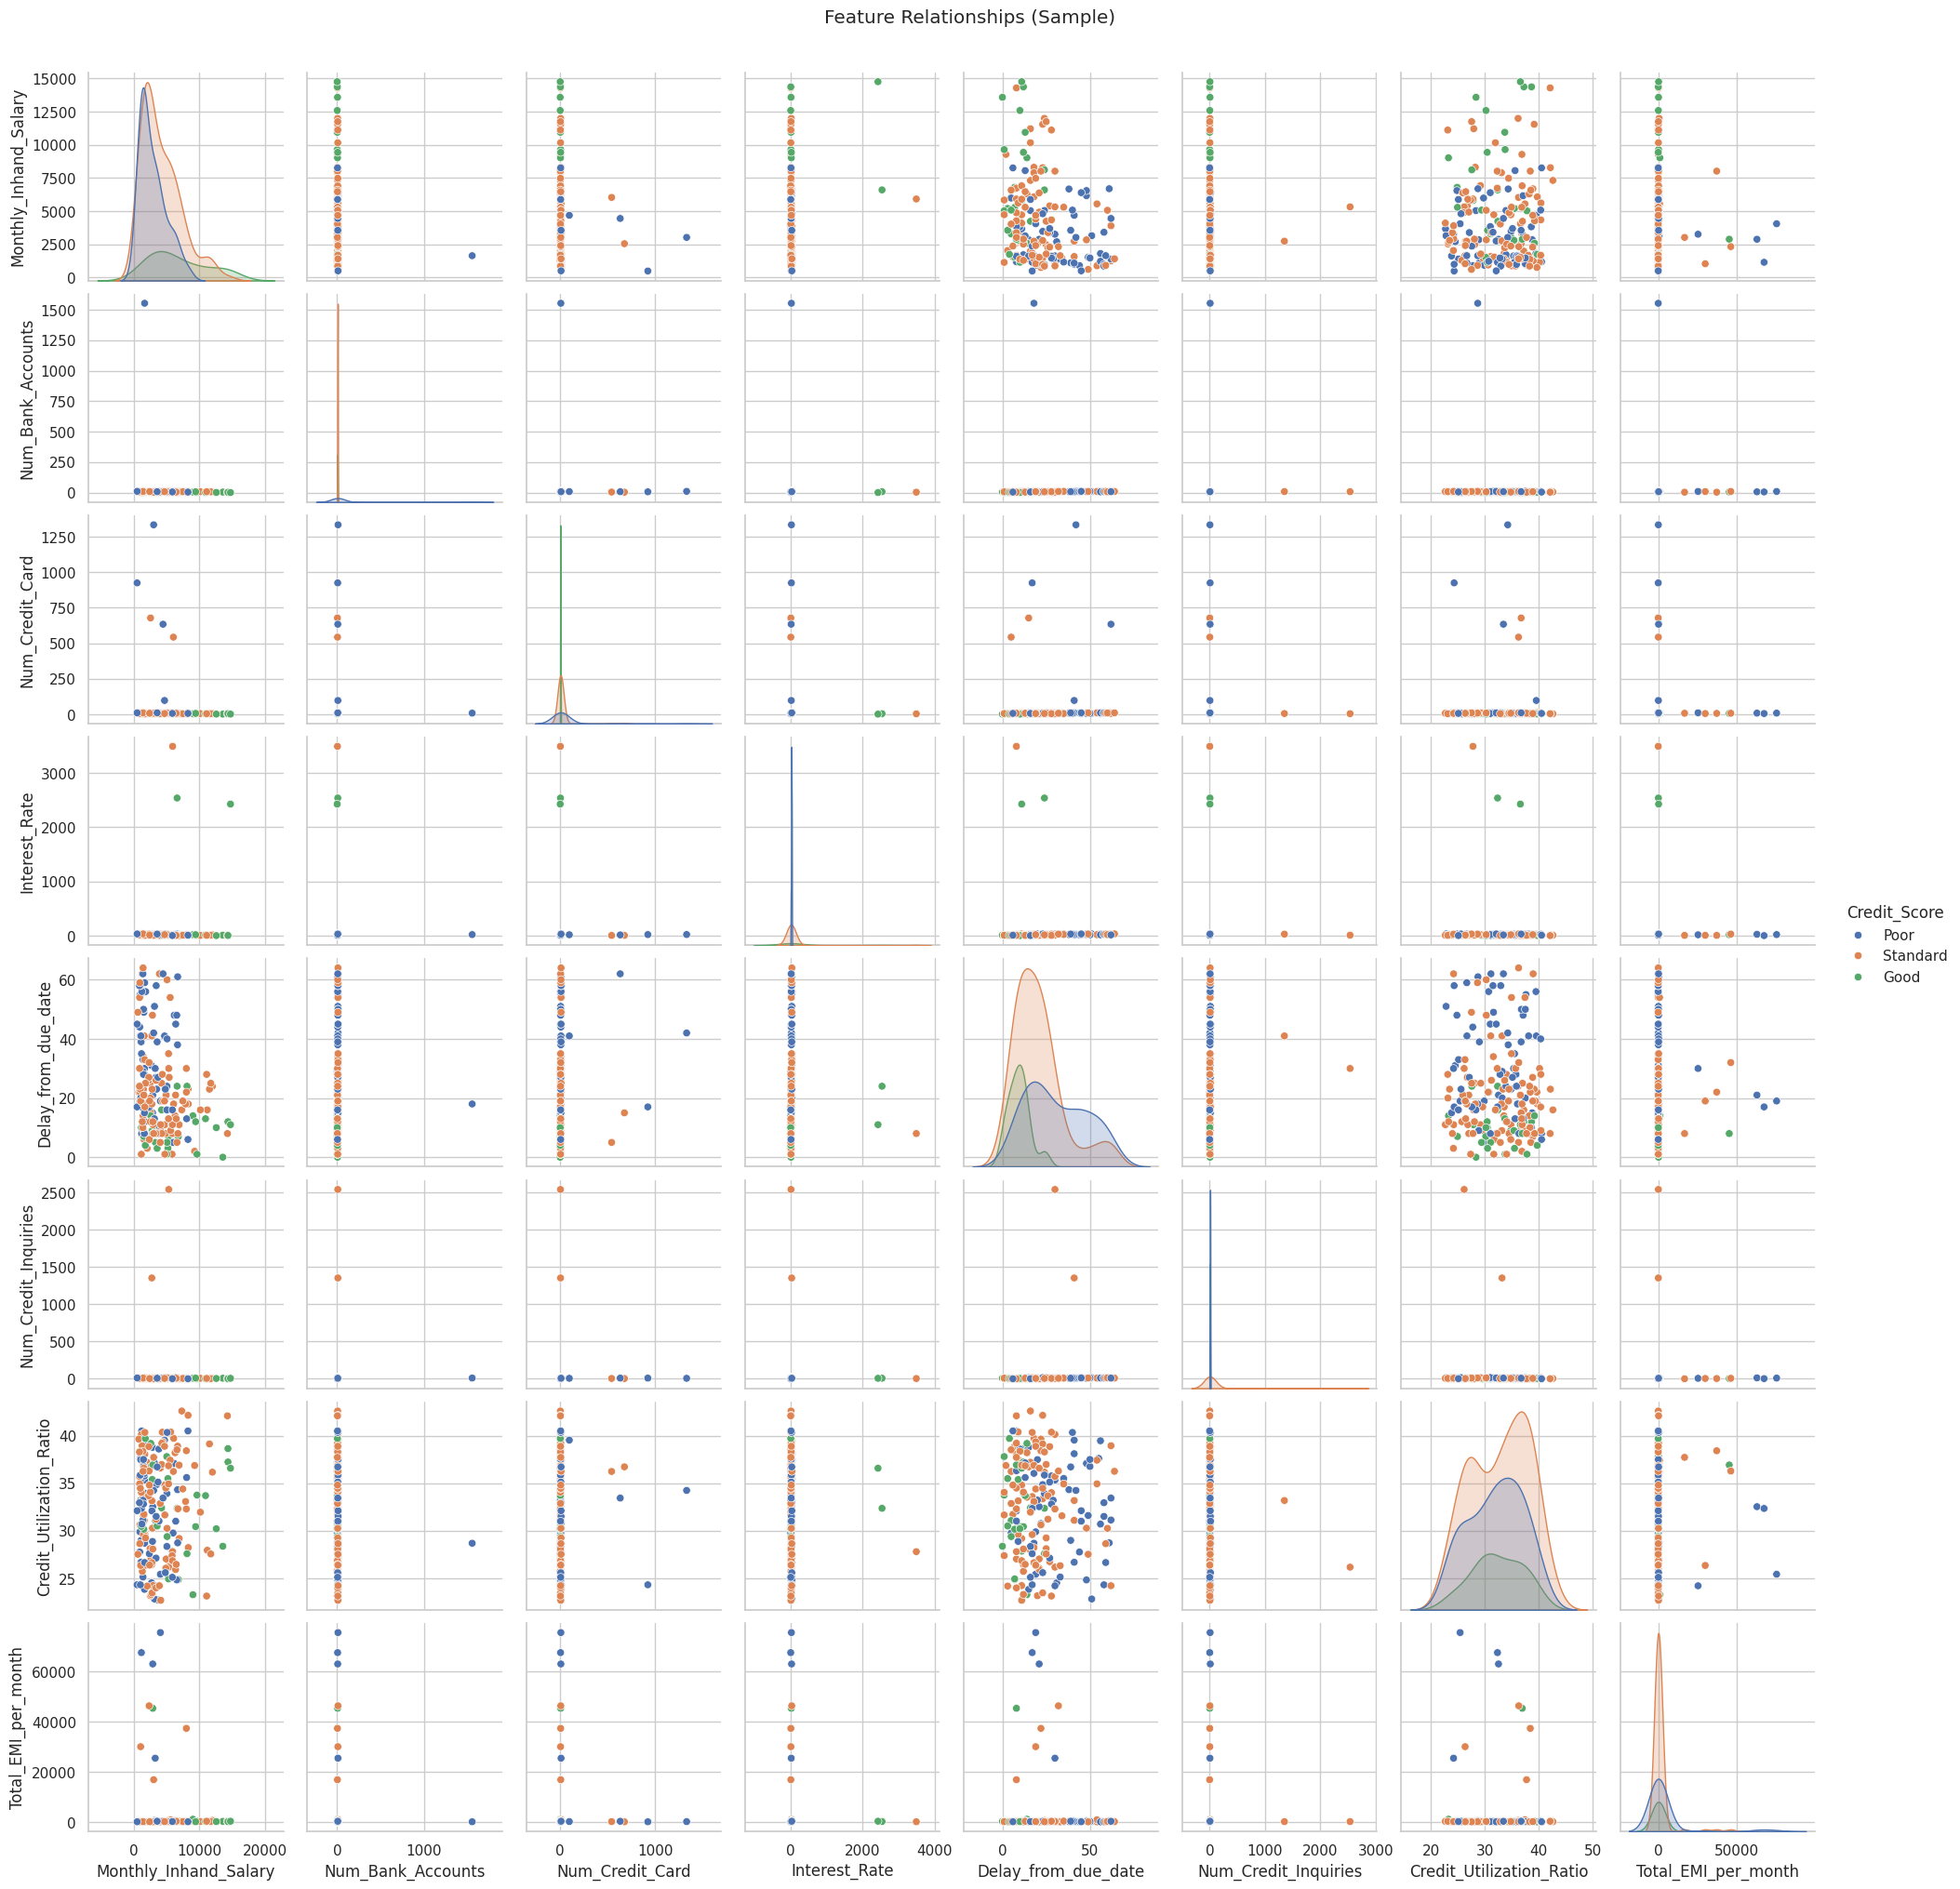

In [27]:
sns.pairplot(df.sample(n=min(200, len(df))), hue="Credit_Score")
plt.suptitle("Feature Relationships (Sample)", y=1.02)
plt.show()


# Encode categorical features if any


Label Encoding

In [28]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

eatures and target

In [29]:
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]


Scale

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [31]:
X = X.drop(columns=["ID", "Customer_ID"])


 Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#XGBoost

In [33]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [34]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Evaluation

In [35]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(" Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1014   10  454]
 [  54 2285  627]
 [ 341  643 3870]]
 Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70      1478
           1       0.78      0.77      0.77      2966
           2       0.78      0.80      0.79      4854

    accuracy                           0.77      9298
   macro avg       0.76      0.75      0.76      9298
weighted avg       0.77      0.77      0.77      9298




 ROC AUC score


In [36]:
from sklearn.preprocessing import label_binarize  # Import label_binarize
roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.9014708806020207


 ROC Curve

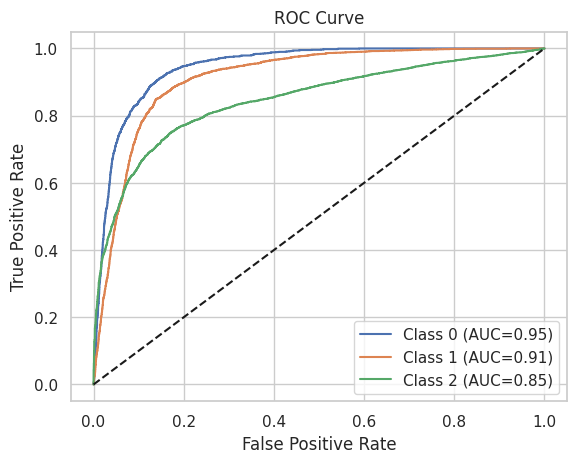

In [37]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Permutation importance plot


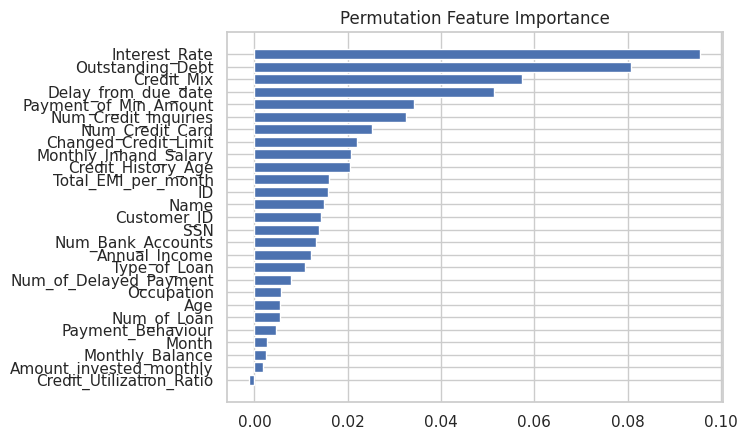

In [40]:
perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
sorted_idx = perm.importances_mean.argsort()
# feature names from the original X before dropping columns
original_feature_names = df.drop("Credit_Score", axis=1).columns
plt.barh(original_feature_names[sorted_idx], perm.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance")
plt.show()

Partial Dependence Plots fortop 3 features


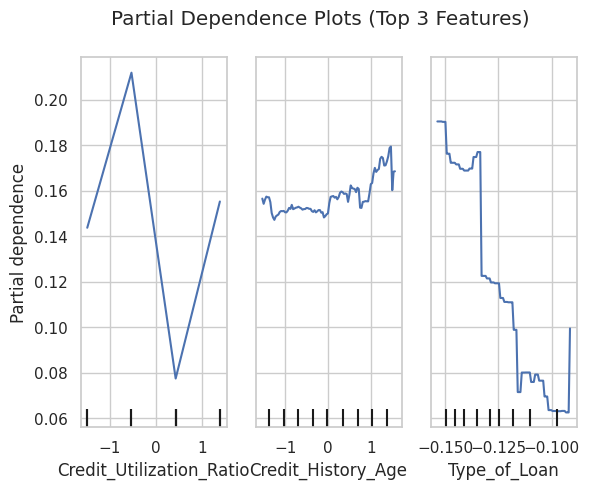

In [41]:
from sklearn.inspection import PartialDependenceDisplay

top_features = sorted_idx[-3:]
PartialDependenceDisplay.from_estimator(model, X_test, features=top_features, feature_names=X.columns, target=0)
plt.suptitle("Partial Dependence Plots (Top 3 Features)")
plt.show()

SHAP (Global + Local)

# SHAP plot


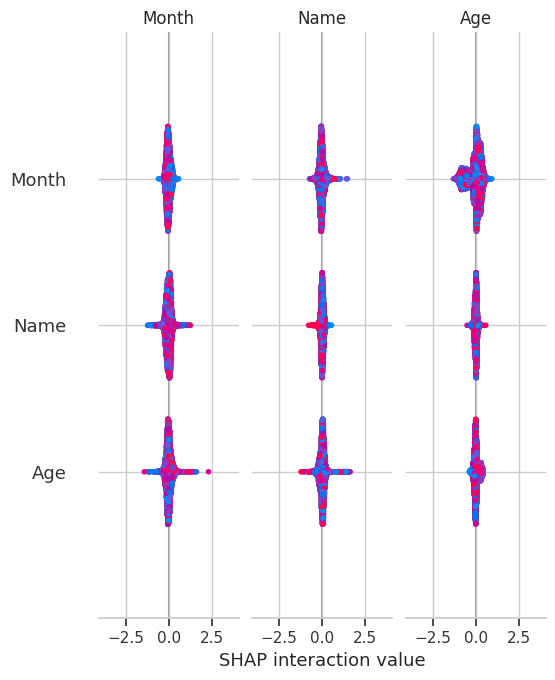

In [42]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

SHAP waterfall plot for the first prediction

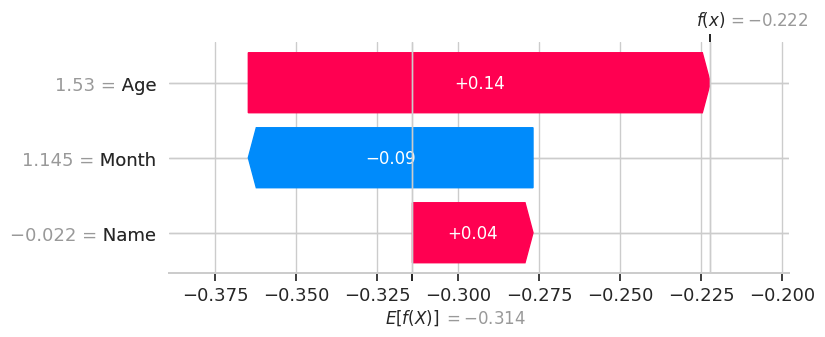

In [43]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0][0],
    base_values=explainer.expected_value[0],
    data=X_test[0],
    feature_names=X.columns
))

# LIME


In [45]:
lime_exp = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=original_feature_names,
    class_names=["Poor", "Fair", "Good"],
    discretize_continuous=True
)
explanation = lime_exp.explain_instance(X_test[0], model.predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True)

REFRANCE
https://link.springer.com/chapter/10.1007/978-3-031-48465-0_2